<a href="https://colab.research.google.com/github/bhanu-bhadouria/Wine-quality-and-score-predictor/blob/main/Wine_quality_and_score_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wine quality score prediction

This notebook demonstrates the implementation of regression models to predict on a scale of 1 to 10 the quality of a wine based on various features. After that we convert differentiate good quality wine(7 and above) and bad quality wine(6 and below) by using a classifier Random forest classifier


# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the dataset

The dataset used in training & testing the model is wineQT.csv which is publicily available on https://www.kaggle.com/datasets/yasserh/wine-quality-dataset

In [ ]:
dataset = pd.read_csv("WineQT.csv")

In [ ]:
dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


# Data Preprocessing

In [ ]:
dataset = dataset.reset_index(drop = True)

In [ ]:
dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [ ]:
dataset = dataset.sample(frac = 1) #shuffling the dataset

In [ ]:
dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
717,11.3,0.36,0.66,2.4,0.123,3.0,8.0,0.99642,3.20,0.53,11.9,6,1021
681,8.5,0.66,0.20,2.1,0.097,23.0,113.0,0.99733,3.13,0.48,9.2,5,967
471,7.2,0.57,0.06,1.6,0.076,9.0,27.0,0.99720,3.36,0.70,9.6,6,662
691,9.1,0.50,0.30,1.9,0.065,8.0,17.0,0.99774,3.32,0.71,10.5,6,983
206,8.7,0.52,0.09,2.5,0.091,20.0,49.0,0.99760,3.34,0.86,10.6,7,288
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
884,7.1,0.72,0.00,1.8,0.123,6.0,14.0,0.99627,3.45,0.58,9.8,5,1252
347,8.7,0.69,0.31,3.0,0.086,23.0,81.0,1.00020,3.48,0.74,11.6,6,493
537,8.3,0.65,0.10,2.9,0.089,17.0,40.0,0.99803,3.29,0.55,9.5,5,753


Finding missing values

In [ ]:
missing_values_count = dataset.isna().sum()

In [ ]:
missing_values_count

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

Correlation matrix

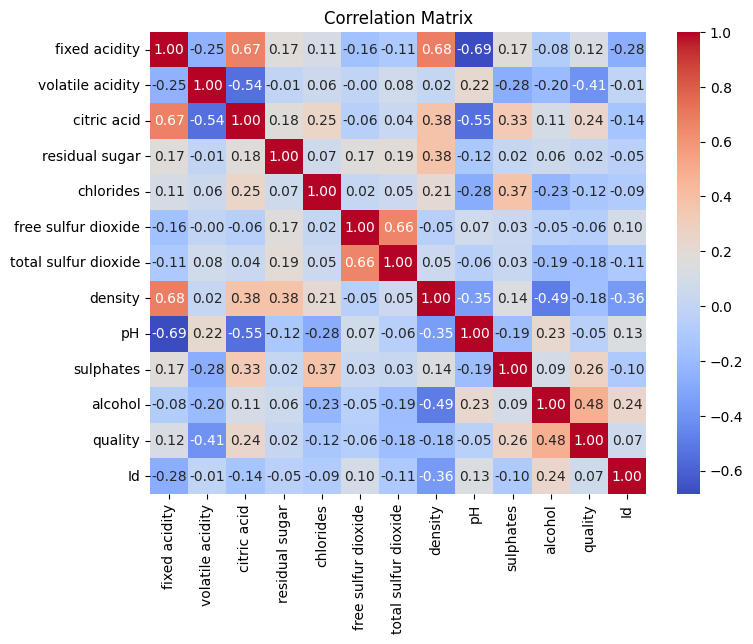

In [ ]:
corr_matrix = dataset.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
dataset = dataset.drop("Id", axis = 1) # dropping the ID column
dataset = dataset.drop("residual sugar", axis = 1) # dropping the residual sugar column
dataset = dataset.drop("chlorides", axis = 1) #dropping the chlorides column
dataset = dataset.drop("free sulfur dioxide", axis = 1) # dropping the free sulfur dioxide column
dataset = dataset.drop("pH", axis = 1) # dropping the pH column
dataset = dataset.drop("fixed acidity", axis = 1) # dropping the fixed acidity column

In [ ]:
dataset = dataset.drop("total sulfur dioxide", axis = 1) # dropping the total sulfur dioxide column

In [ ]:
dataset = dataset.drop("density", axis = 1) # dropping the total sulfur dioxide column

In [ ]:
dataset

,volatile acidity,citric acid,sulphates,alcohol,quality
717,0.36,0.66,0.53,11.9,6
681,0.66,0.20,0.48,9.2,5
471,0.57,0.06,0.70,9.6,6
691,0.50,0.30,0.71,10.5,6
206,0.52,0.09,0.86,10.6,7
...,...,...,...,...,...
1,0.88,0.00,0.68,9.8,5
884,0.72,0.00,0.58,9.8,5
347,0.69,0.31,0.74,11.6,6
537,0.65,0.10,0.55,9.5,5


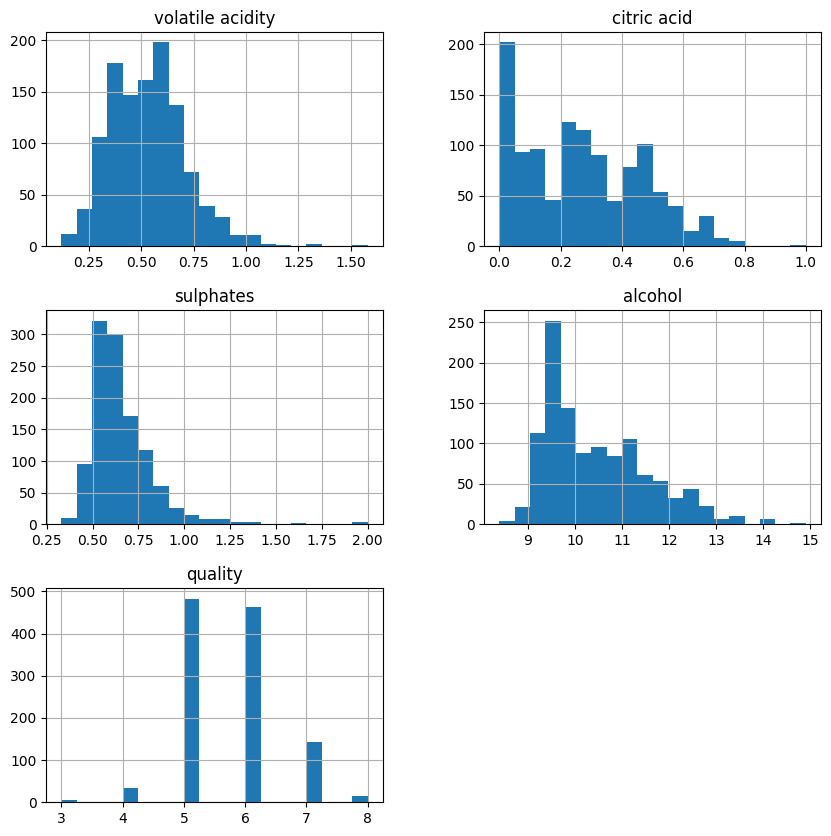

In [ ]:
dataset.hist(bins=20, figsize=(10, 10)) # visulaize the maximum vlaue and minimum value in every column
plt.show()

plot every column against every column to determine linearity among dataset

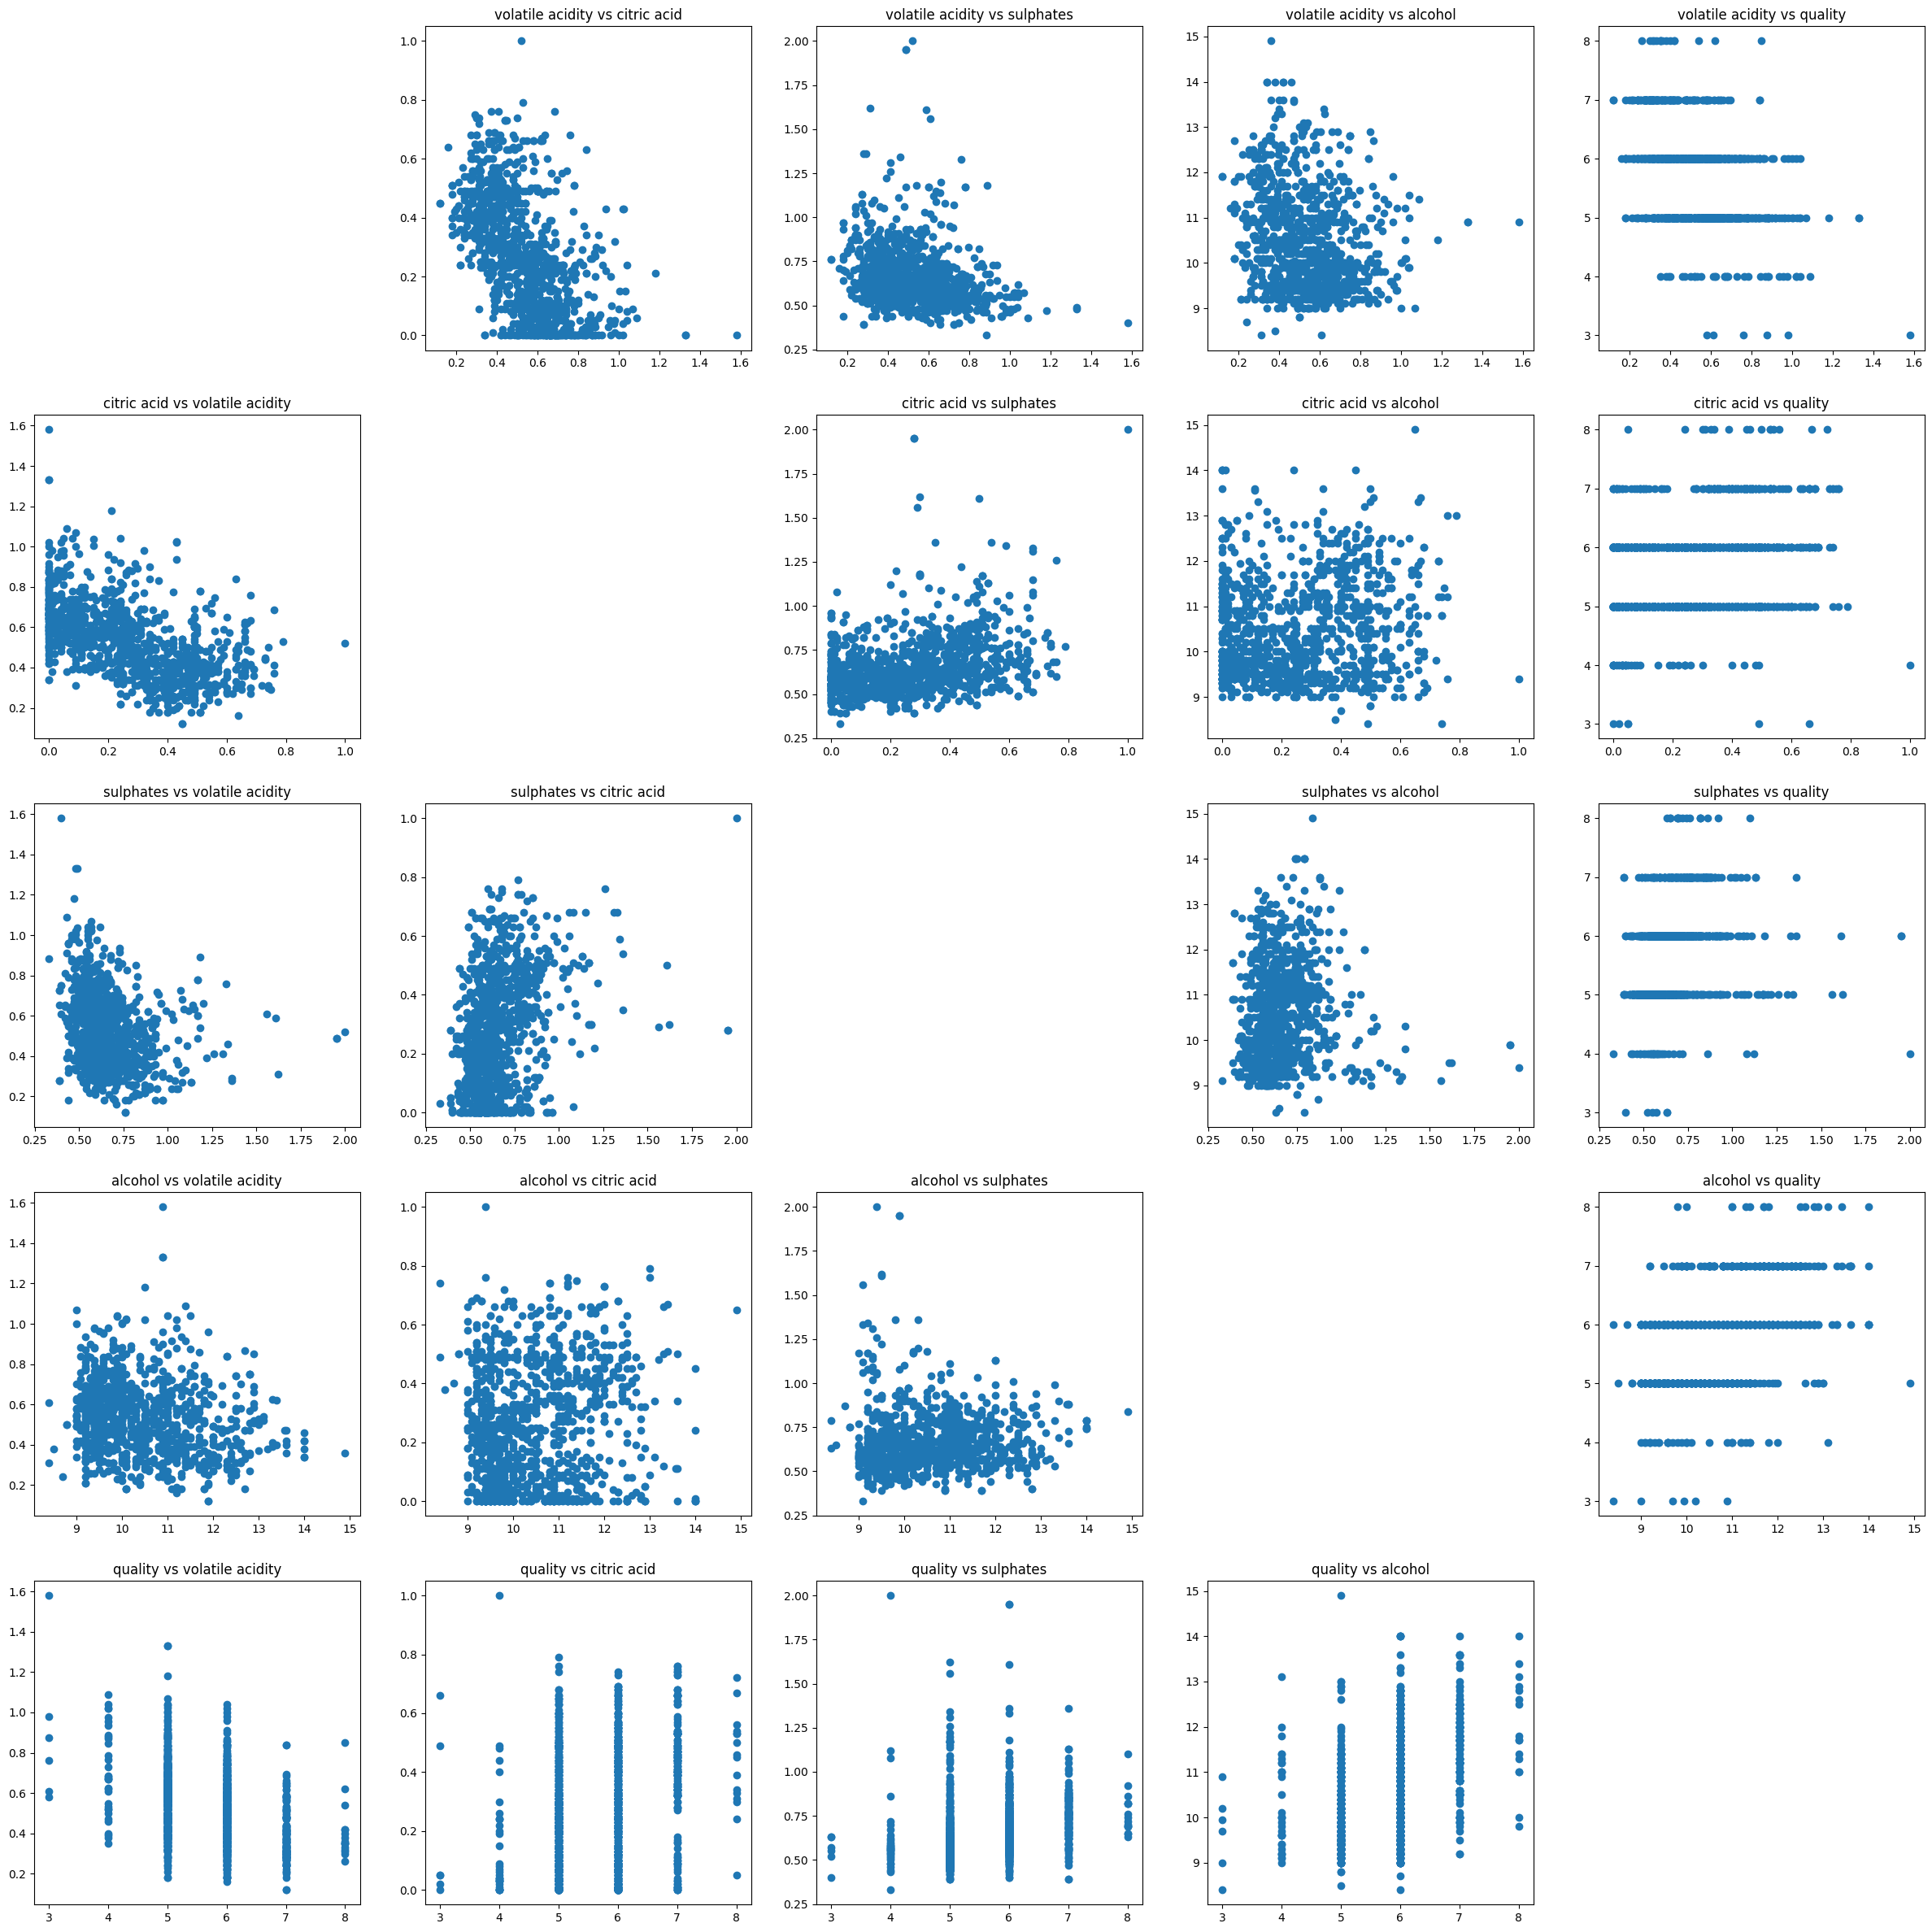

In [ ]:
def plot_all_scatter(df):
  fig, axes = plt.subplots(nrows=len(df.columns), ncols=len(df.columns), figsize=(30, 30))

  # Iterate through each column combination
  for i in range(len(df.columns)):
    for j in range(len(df.columns)):
      ax = axes[i, j]
      if i != j:  # Avoid plotting the same column twice (diagonals)
        ax.scatter(df.iloc[:, i], df.iloc[:, j])
        ax.set_title(f"{df.columns[i]} vs {df.columns[j]}")
      else:
        ax.axis('off')  # Hide plots for diagonal entries

  plt.show()

# Create the scatter plots
plot_all_scatter(dataset.copy())

Splitting the dataset into features and target variable

In [ ]:
X = dataset.iloc[ : , : -1].values
y = dataset.iloc[ : , -1].values

In [ ]:
X

array([[ 0.36,  0.66,  0.53, 11.9 ],
       [ 0.66,  0.2 ,  0.48,  9.2 ],
       [ 0.57,  0.06,  0.7 ,  9.6 ],
       ...,
       [ 0.69,  0.31,  0.74, 11.6 ],
       [ 0.65,  0.1 ,  0.55,  9.5 ],
       [ 0.43,  0.45,  0.7 , 12.5 ]])

In [ ]:
y

array([6, 5, 6, ..., 6, 5, 6])

Splitting the dataset into training and testing dataset

In [ ]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)

Applying standard scaler to the dataset

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[-0.8 ,  0.88,  3.29, -0.87],
       [-0.68,  2.1 ,  3.81, -1.05],
       [-1.13,  0.73, -0.22,  1.49],
       ...,
       [ 0.08, -0.74, -0.28,  1.03],
       [ 0.61, -0.49, -0.93, -0.87],
       [-1.02,  0.68,  0.24,  1.4 ]])

In [ ]:
X_test

array([[-1.47, -0.13,  0.01,  2.12],
       [ 0.44, -0.64, -0.4 , -0.87],
       [-0.68,  0.78, -0.22, -0.87],
       [-0.96,  0.27,  0.36,  0.49],
       [ 0.08, -1.05,  0.07,  0.22],
       [-0.46,  0.48,  1.  ,  0.04],
       [ 1.17, -0.39, -0.63, -0.96],
       [-0.18, -0.49, -1.04, -0.87],
       [ 0.44, -0.03, -0.75, -0.6 ],
       [ 0.44, -0.79,  0.01,  0.4 ],
       [-1.13,  0.94,  1.36,  0.58],
       [-0.01, -0.23, -0.57, -0.24],
       [-0.18,  1.14,  0.77,  0.22],
       [ 0.39,  1.19, -0.52, -0.69],
       [-0.06, -1.  ,  0.89, -0.78],
       [-0.74,  1.19, -0.46, -0.06],
       [ 0.39, -0.23, -0.98, -0.51],
       [ 1.12, -0.28, -0.81, -0.87],
       [-1.19, -0.18, -0.22, -0.33],
       [ 0.5 , -1.05, -0.75, -0.69],
       [-0.57,  0.12, -0.11, -0.87],
       [-1.08, -0.08, -1.28, -0.33],
       [ 0.33, -1.25, -0.75, -0.69],
       [ 0.22, -0.28, -0.69, -0.6 ],
       [-0.8 , -0.84, -1.33, -0.69],
       [ 0.22, -1.25, -0.22,  0.31],
       [ 1.99, -0.34, -1.16, -0.42],
 

# Training the linear regression model

In [ ]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

# Evaluating the Linear regression model

In [ ]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[6.7  6.  ]
 [5.19 5.  ]
 [5.47 6.  ]
 [6.08 6.  ]
 [5.72 6.  ]
 [5.9  5.  ]
 [4.96 5.  ]
 [5.25 5.  ]
 [5.23 5.  ]
 [5.68 6.  ]
 [6.28 7.  ]
 [5.48 6.  ]
 [5.85 6.  ]
 [5.24 5.  ]
 [5.52 6.  ]
 [5.72 5.  ]
 [5.24 5.  ]
 [4.98 5.  ]
 [5.78 5.  ]
 [5.2  5.  ]
 [5.46 5.  ]
 [5.6  5.  ]
 [5.24 6.  ]
 [5.29 6.  ]
 [5.41 6.  ]
 [5.67 6.  ]
 [4.88 5.  ]
 [5.11 5.  ]
 [5.37 5.  ]
 [5.59 6.  ]
 [6.12 6.  ]
 [4.97 5.  ]
 [5.98 6.  ]
 [5.47 5.  ]
 [6.14 6.  ]
 [6.05 7.  ]
 [6.23 6.  ]
 [5.79 7.  ]
 [5.94 6.  ]
 [5.4  5.  ]
 [6.02 6.  ]
 [6.41 7.  ]
 [6.02 6.  ]
 [5.21 6.  ]
 [6.29 6.  ]
 [5.74 5.  ]
 [4.58 5.  ]
 [5.46 6.  ]
 [4.65 5.  ]
 [5.34 5.  ]
 [6.38 7.  ]
 [6.05 5.  ]
 [6.34 6.  ]
 [5.74 5.  ]
 [5.65 6.  ]
 [4.93 5.  ]
 [5.45 5.  ]
 [5.3  6.  ]
 [6.12 7.  ]
 [5.25 5.  ]
 [5.39 6.  ]
 [5.17 5.  ]
 [6.35 7.  ]
 [5.42 5.  ]
 [5.42 4.  ]
 [6.37 7.  ]
 [5.35 6.  ]
 [5.08 6.  ]
 [5.4  5.  ]
 [5.18 5.  ]
 [5.96 6.  ]
 [5.69 6.  ]
 [5.32 5.  ]
 [5.73 6.  ]
 [5.11 5.  ]
 [5.19 5.  ]
 [5.43 5.  ]

RMSE (Root mean squared error)

In [ ]:
from sklearn.metrics import mean_squared_error
import math
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print("RMSE:", rmse)

RMSE: 0.6205960805114433


R-Squred metric evaluation

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("r2: ", r2)

r2:  0.3006544229584459


# Training the polynomial regression model

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree = 6)
X_poly = poly.fit_transform(X)

from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)

poly_model = LinearRegression()
poly_model.fit(X_train, y_train)

LinearRegression()

# Evaluating the polynomial regression model

In [ ]:
y_pred = poly_model.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[6.7  6.  ]
 [5.19 5.  ]
 [5.47 6.  ]
 [6.08 6.  ]
 [5.72 6.  ]
 [5.9  5.  ]
 [4.96 5.  ]
 [5.25 5.  ]
 [5.23 5.  ]
 [5.68 6.  ]
 [6.28 7.  ]
 [5.48 6.  ]
 [5.85 6.  ]
 [5.24 5.  ]
 [5.52 6.  ]
 [5.72 5.  ]
 [5.24 5.  ]
 [4.98 5.  ]
 [5.78 5.  ]
 [5.2  5.  ]
 [5.46 5.  ]
 [5.6  5.  ]
 [5.24 6.  ]
 [5.29 6.  ]
 [5.41 6.  ]
 [5.67 6.  ]
 [4.88 5.  ]
 [5.11 5.  ]
 [5.37 5.  ]
 [5.59 6.  ]
 [6.12 6.  ]
 [4.97 5.  ]
 [5.98 6.  ]
 [5.47 5.  ]
 [6.14 6.  ]
 [6.05 7.  ]
 [6.23 6.  ]
 [5.79 7.  ]
 [5.94 6.  ]
 [5.4  5.  ]
 [6.02 6.  ]
 [6.41 7.  ]
 [6.02 6.  ]
 [5.21 6.  ]
 [6.29 6.  ]
 [5.74 5.  ]
 [4.58 5.  ]
 [5.46 6.  ]
 [4.65 5.  ]
 [5.34 5.  ]
 [6.38 7.  ]
 [6.05 5.  ]
 [6.34 6.  ]
 [5.74 5.  ]
 [5.65 6.  ]
 [4.93 5.  ]
 [5.45 5.  ]
 [5.3  6.  ]
 [6.12 7.  ]
 [5.25 5.  ]
 [5.39 6.  ]
 [5.17 5.  ]
 [6.35 7.  ]
 [5.42 5.  ]
 [5.42 4.  ]
 [6.37 7.  ]
 [5.35 6.  ]
 [5.08 6.  ]
 [5.4  5.  ]
 [5.18 5.  ]
 [5.96 6.  ]
 [5.69 6.  ]
 [5.32 5.  ]
 [5.73 6.  ]
 [5.11 5.  ]
 [5.19 5.  ]
 [5.43 5.  ]

R-Squred metric evaluation

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("r2: ", r2)

r2:  0.3006544229584488


# Wine quality classifier

In [ ]:
# First we need to classify the wine quality as currently the quality is a score which is in range of 1-10
y = dataset["quality"].apply(lambda y_value: 1 if y_value >= 7 else 0)
print(y)

717    0
681    0
471    0
691    0
206    1
      ..
1      0
884    0
347    0
537    0
238    0
Name: quality, Length: 1143, dtype: int64


Splitting the dataset for Random forest classifier

In [ ]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)

# Random forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_classifier = RandomForestClassifier()

forest_classifier.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred = forest_classifier.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0]


# Accuracy of random forest classifier


In [ ]:
from sklearn.metrics import accuracy_score

acc_score = accuracy_score(y_pred, y_test)
print("accuracy: ", acc_score)

accuracy:  0.9301310043668122
